In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

import warnings
warnings.filterwarnings('ignore')


In [154]:
# we have below two files

train= pd.read_csv('bigdatamart_Train.csv')
test= pd.read_csv('bigdatamart_Test.csv')

In [155]:
# Merge these two files

train['source']='train'
test['source']='test'
df=pd.concat([train,test], ignore_index=True)

print(train.shape, test.shape, df.shape)

(8523, 13) (5681, 12) (14204, 13)


In [156]:
df.head

<bound method NDFrame.head of       Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.000000   
4               NCD19         8.93          Low Fat         0.000000   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.000000   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092       

In [157]:
df.sample(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
2004,FDR01,5.405,Regular,0.053730,Canned,199.0742,OUT045,2002,NaN,Tier 2,Supermarket Type1,4777.7808,train
10325,DRN36,15.200,Low Fat,0.050462,Soft Drinks,95.5752,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
4701,FDA50,16.250,Low Fat,0.087159,Dairy,95.1410,OUT035,2004,Small,Tier 2,Supermarket Type1,2220.4430,train


In [158]:
data=pd.DataFrame(df)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [159]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [160]:
categorical_features=data.select_dtypes(include=[np.object])
categorical_features.head(3)


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train


In [161]:
# lets check our numerical * categorical columns in details

numerical_features=data.select_dtypes(include=[np.number])
numerical_features.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700


In [162]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [163]:
# check missing values

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

<AxesSubplot:>

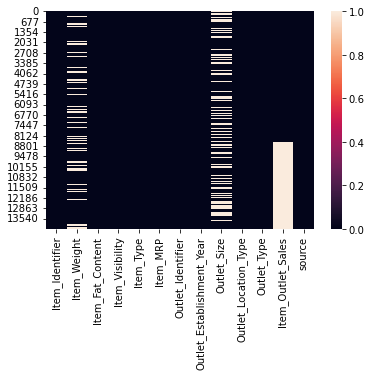

In [164]:
sns.heatmap(data.isnull())

In [165]:
# The above dataset has null values in 3 columns
# This Dataset has nan values 
# so we will use Simple Imputer and make Nan values as nil

In [166]:
data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

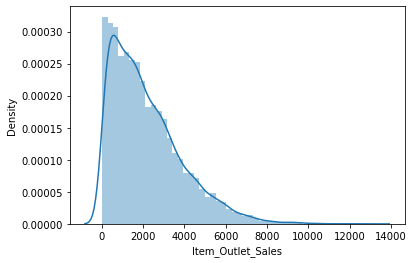

In [167]:
sns.distplot(data['Item_Outlet_Sales'])

In [168]:
# Check Skewness

data.skew()

Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.177531
dtype: float64

In [169]:
# check unique value only in target column

data.Item_Outlet_Sales.unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 3608.636 , 2778.3834,
             nan])

In [170]:
data.Item_Outlet_Sales.value_counts

<bound method IndexOpsMixin.value_counts of 0        3735.1380
1         443.4228
2        2097.2700
3         732.3800
4         994.7052
           ...    
14199          NaN
14200          NaN
14201          NaN
14202          NaN
14203          NaN
Name: Item_Outlet_Sales, Length: 14204, dtype: float64>

In [171]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

<AxesSubplot:>

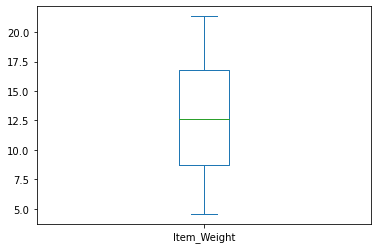

In [172]:
data['Item_Weight'].plot.box()

<AxesSubplot:>

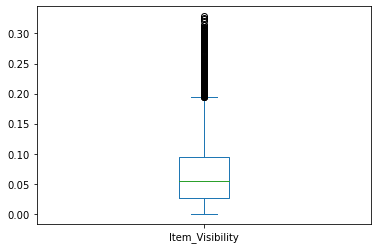

In [173]:
data['Item_Visibility'].plot.box()

<AxesSubplot:>

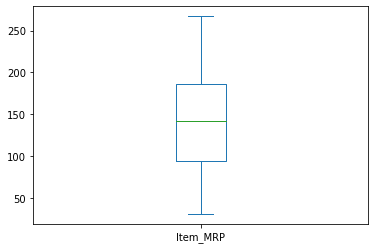

In [174]:
data['Item_MRP'].plot.box()

<AxesSubplot:>

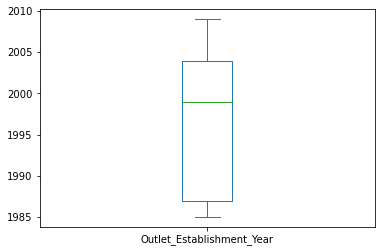

In [175]:
data['Outlet_Establishment_Year'].plot.box()

<AxesSubplot:>

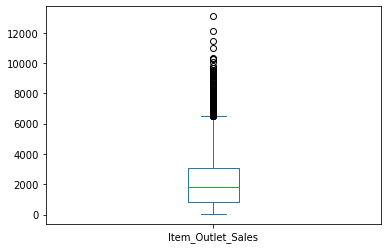

In [176]:
data['Item_Outlet_Sales'].plot.box()

Item_Weight                     AxesSubplot(0.125,0.536818;0.110714x0.343182)
Item_Visibility              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Item_MRP                     AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Item_Outlet_Sales            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
dtype: object

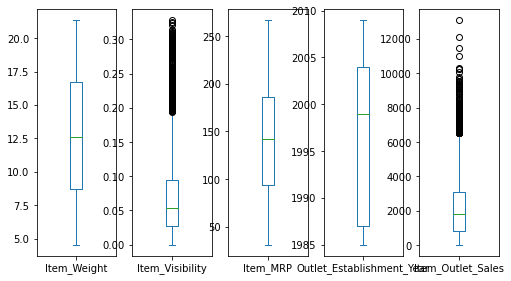

In [177]:
data.plot(kind='box', subplots=True, layout=(2,6), figsize=(10,10))

In [178]:
# Observation : we can see that Item_visibility and Item_outlet_sales has some outliers are present

In [179]:
# scatterplot for categiral variable

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

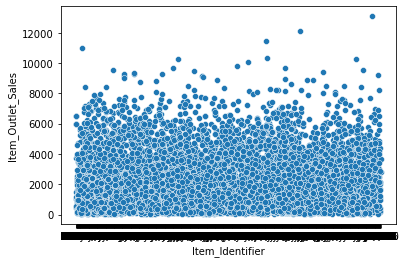

In [180]:
sns.scatterplot(x='Item_Identifier', y='Item_Outlet_Sales', data=data)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

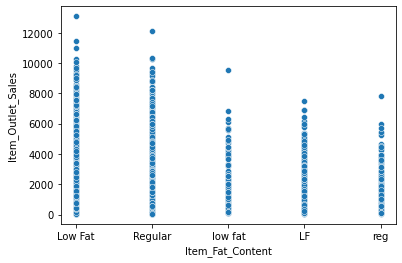

In [181]:
sns.scatterplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

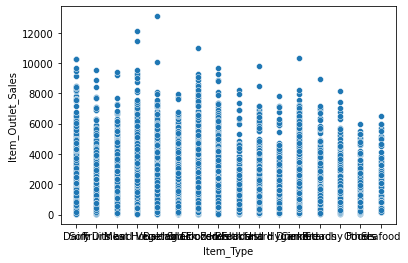

In [182]:
sns.scatterplot(x='Item_Type', y='Item_Outlet_Sales', data=data)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

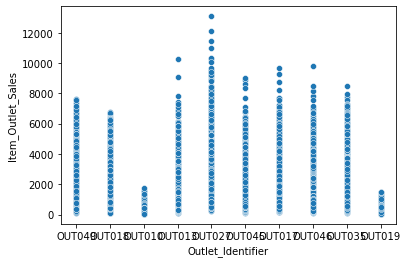

In [183]:
sns.scatterplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

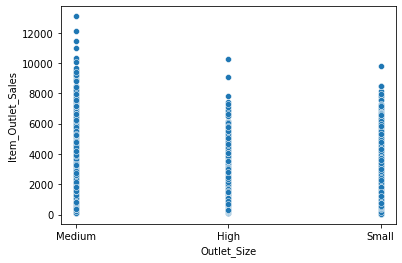

In [184]:
sns.scatterplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

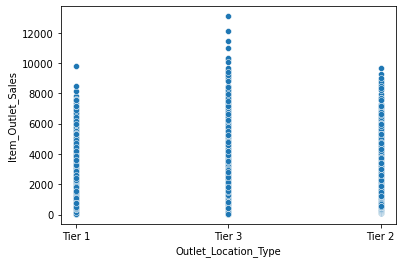

In [185]:
sns.scatterplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data)

<AxesSubplot:xlabel='source', ylabel='Item_Outlet_Sales'>

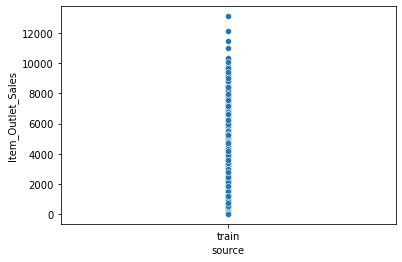

In [186]:
sns.scatterplot(x='source', y='Item_Outlet_Sales', data=data)

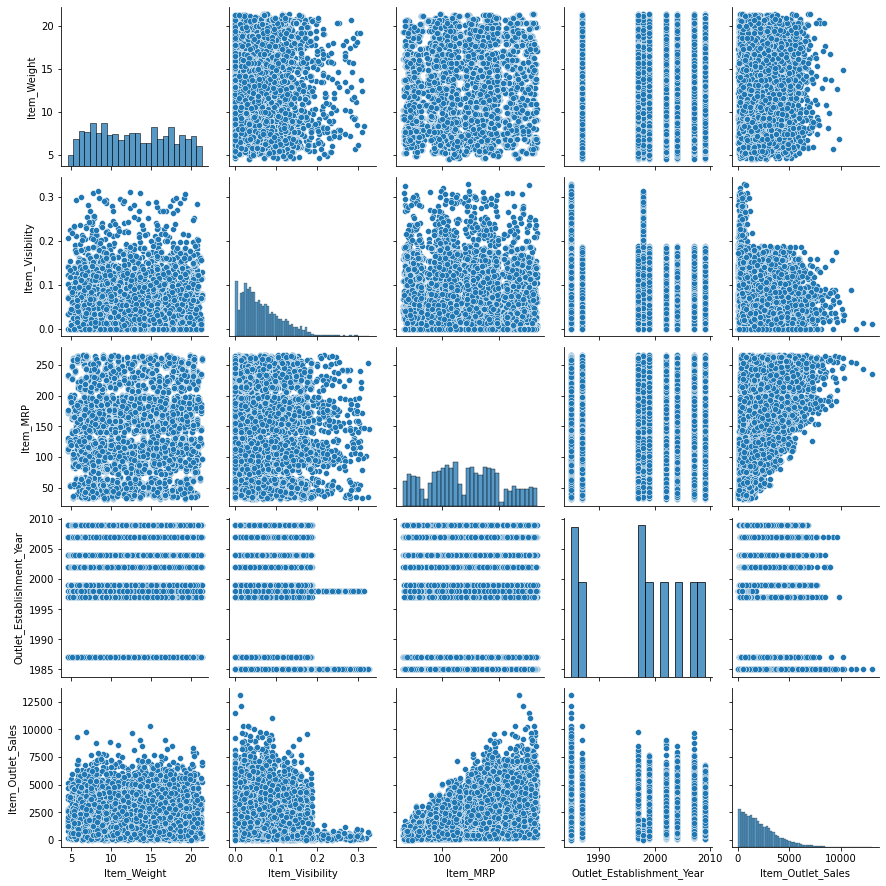

In [187]:
sns.pairplot(data)
plt.show()

In [188]:
# Lets start lokking Outlwt_size

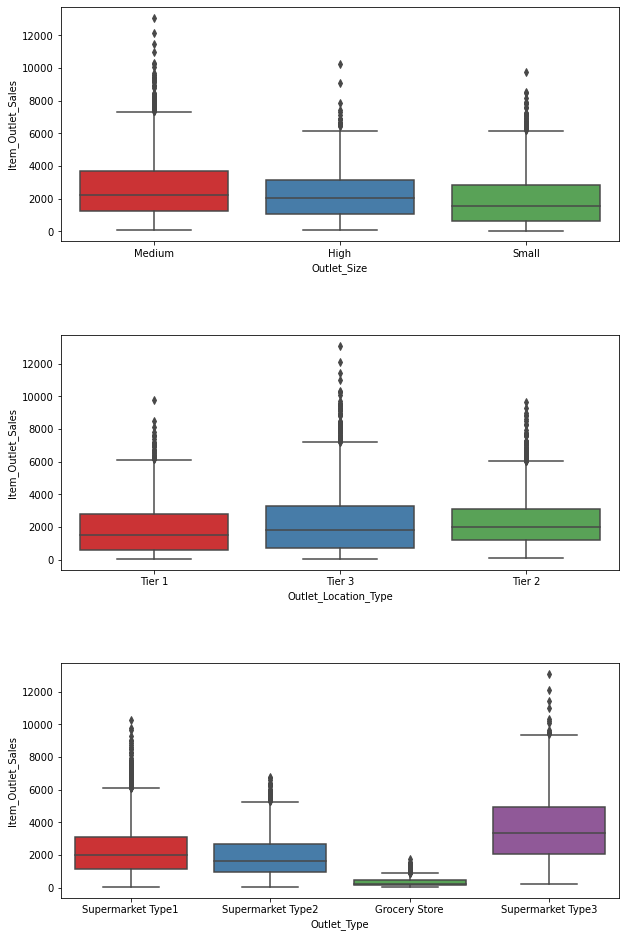

In [189]:
# here 311 is specifically mentiones for dimensions otherwise you could have used anyintegers

plt.figure(figsize=(10,9))


plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data, palette='Set1')

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data, palette='Set1')

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette='Set1')

plt.subplots_adjust(wspace=0.2, hspace=0.4, top=1.5)
plt.show()


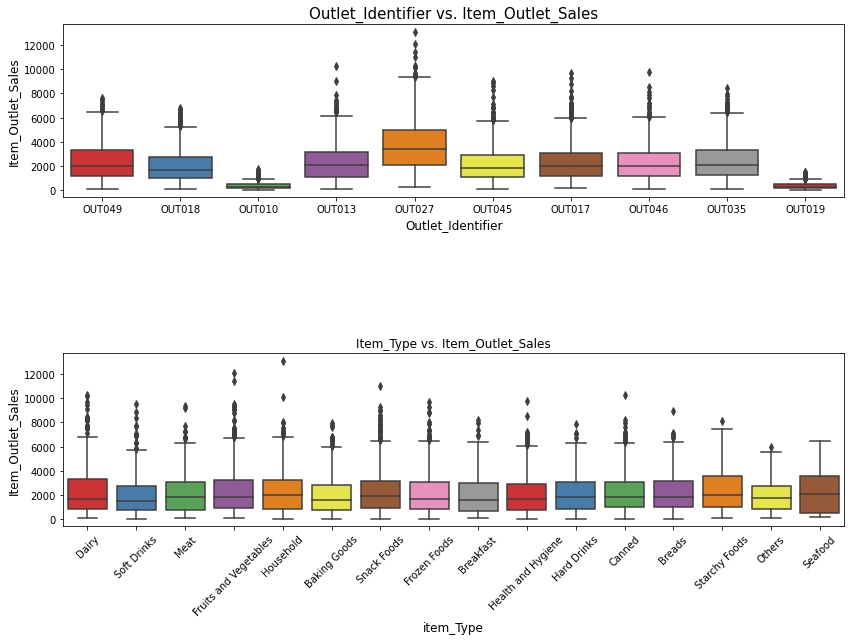

In [190]:

plt.figure(figsize=(14,9))

plt.subplot(211)
ax=sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette='Set1')

ax.set_title('Outlet_Identifier vs. Item_Outlet_Sales', fontsize=15)
ax.set_xlabel('Outlet_Identifier', fontsize=12)
ax.set_ylabel('Item_Outlet_Sales', fontsize=12)

plt.subplot(212)
ax=sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette='Set1')

ax.set_title('Item_Type vs. Item_Outlet_Sales', fontsize=12)
ax.set_xlabel('item_Type', fontsize=12)
ax.set_ylabel('Item_Outlet_Sales', fontsize=12)

plt.subplots_adjust(hspace=0.9, top=0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [191]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

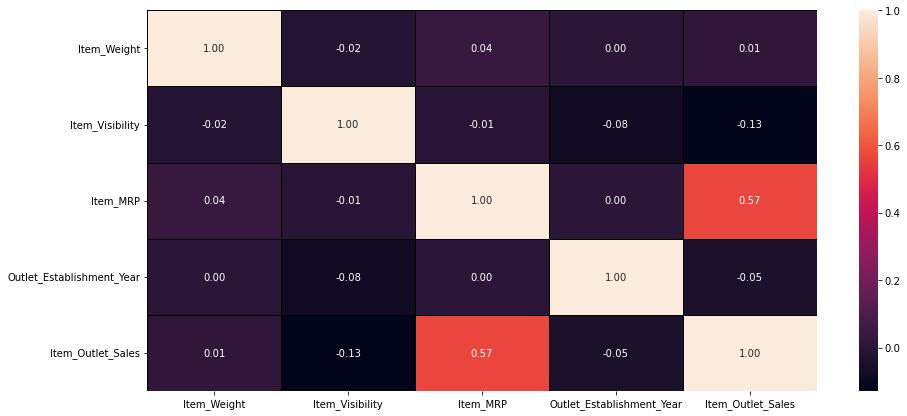

In [192]:
plt.figure(figsize=(15,7))

sns.heatmap(data.corr(), annot=True, linewidth=0.5, linecolor='black', fmt='.2f')

In [193]:
data.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.014123
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [194]:
# Observation of the correlation

In [195]:
round(data.describe()[1:].transpose(),2)

,mean,std,min,25%,50%,75%,max
Item_Weight,12.79,4.65,4.56,8.71,12.60,16.75,21.35
Item_Visibility,0.07,0.05,0.00,0.03,0.05,0.09,0.33
Item_MRP,141.00,62.09,31.29,94.01,142.25,185.86,266.89
Outlet_Establishment_Year,1997.83,8.37,1985.00,1987.00,1999.00,2004.00,2009.00
Item_Outlet_Sales,2181.29,1706.50,33.29,834.25,1794.33,3101.30,13086.96


# We have some NaN values in the datast , so we have balance them using SimpleImputer &/Or Pandas replace method

In [196]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')

data['Outlet_Size']=imp.fit_transform(data['Outlet_Size'].values.reshape(-1,1))

In [197]:
imp= SimpleImputer(missing_values=np.nan, strategy='mean')

data['Item_Outlet_Sales']=imp.fit_transform(data['Item_Outlet_Sales'].values.reshape(-1,1))


In [198]:
imp=SimpleImputer(strategy='most_frequent')

data['Item_Weight']=imp.fit_transform(data['Item_Weight'].values.reshape(-1,1))

In [199]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [200]:
data.shape


(14204, 13)

In [201]:
# check unique values in each columns:

data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [202]:
# Lets check the frequency of Ctegories

for col in categorical_features:
    print('\n%s column: '%col)
    print(data[col].value_counts())


Item_Identifier column: 
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Identifier column: 
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548


In [203]:
# summary stattistics 
# data.describe

In [204]:
# Feature engineering

# consider combining categories in outlet type

data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,1076.412666
Supermarket Type1,2262.232963
Supermarket Type2,2069.766739
Supermarket Type3,3088.550567


In [205]:
# Modify item visibility: determine the average visibility of a product

visibility_avg=data.pivot_table(values='Item_Visibility', index='Item_Identifier')

# impute 0 values with mean visibility of that product:

missing_values=(data['Item_Visibility'] == 0)

print('Number of 0 values initially: %d'%sum(missing_values))
data.loc[missing_values, 'Item_Visibility'] = data.loc[missing_values, 'Item_Identifier'].apply(lambda x:visibility_avg.at[x, 'Item_Visibility'])
print('Number of 0 values after modification:%d'%sum(data['Item_Visibility']==0))


Number of 0 values initially: 879
Number of 0 values after modification:0


In [206]:
# let us create brief description of product categories

data['Item_type_combined']= data['Item_Identifier'].apply(lambda x: x[0:2])

# rename them

data['Item-type_combined']= data['Item_type_combined'].map({'FD': 'Food', 'NC': 'Non-consumable', 'DR': 'Drinks'})

data['Item_type_combined'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_type_combined, dtype: int64

In [207]:
# Item Fat Content:change the categories:

print('Original Categories:')

print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())



Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


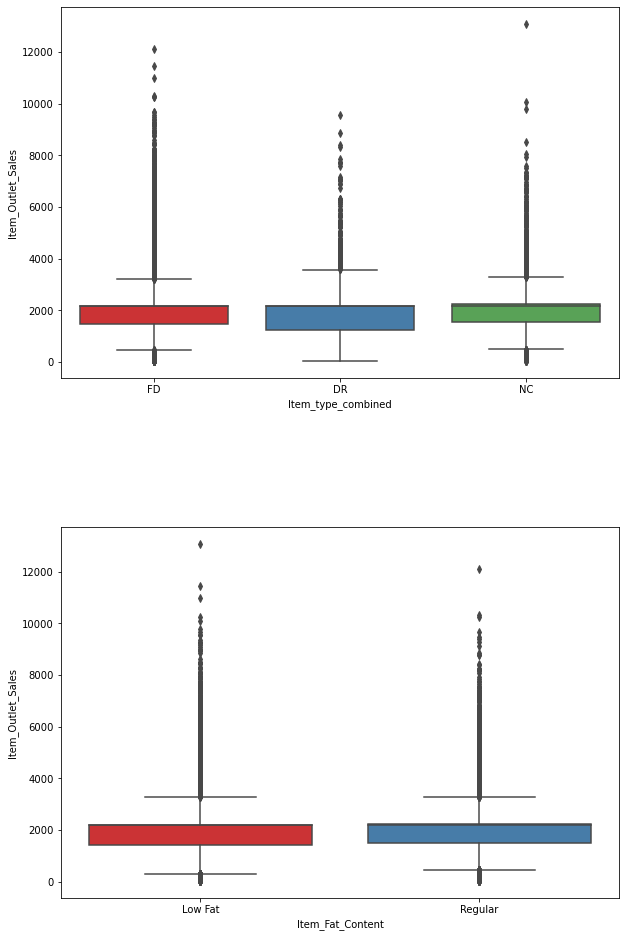

In [208]:
plt.figure(figsize=(10,9))

plt.subplot(211)
sns.boxplot(x='Item_type_combined', y='Item_Outlet_Sales', data=data, palette='Set1')

plt.subplot(212)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data, palette='Set1')

plt.subplots_adjust(wspace=0.2, hspace=0.4, top=1.5)

plt.show()



In [209]:
# Let us see the sales yearwise

data.index=data['Outlet_Establishment_Year']
data.index

Int64Index([1999, 2009, 1999, 1998, 1987, 2009, 1987, 1985, 2002, 2007,
            ...
            1999, 1999, 2009, 1997, 1999, 1997, 2009, 2002, 2007, 2002],
           dtype='int64', name='Outlet_Establishment_Year', length=14204)

In [210]:
df=data.loc[:,['Item_Outlet_Sales']]
df.head(3)

,Item_Outlet_Sales
Outlet_Establishment_Year,
1999,3735.1380
2009,443.4228
1999,2097.2700


<AxesSubplot:xlabel='Outlet_Establishment_Year'>

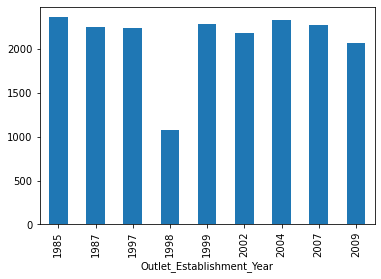

In [211]:
# tO AVOID FUTURE WARNING USE THIS 



data.index.name=None
data.rename_axis(None)


data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

In [212]:
# To determine the years of opration of a specific store ,
# we need to make a new column.and this can be done 



data['Outlet_Years']= 2009 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

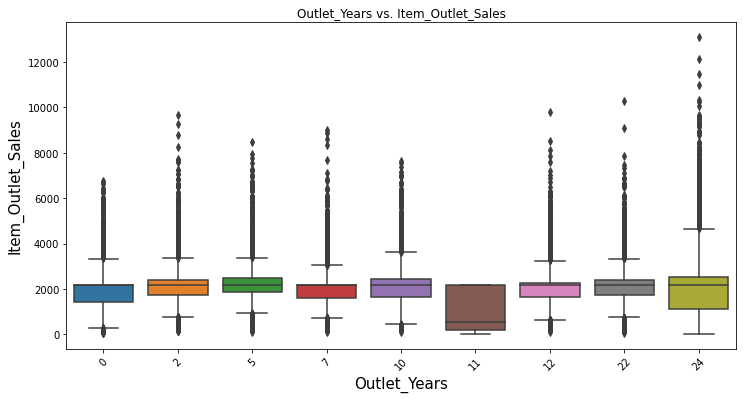

In [213]:
# Now let us check Outeelt years with outlet sales


plt.figure(figsize=(12,6))
ax= sns.boxplot(x= 'Outlet_Years', y='Item_Outlet_Sales', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Outlet_Years vs. Item_Outlet_Sales')
ax.set_xlabel('Outlet_Years', fontsize=15)
ax.set_ylabel('Item_Outlet_Sales', fontsize=15)

plt.show()

In [214]:
# Label Encoding and One Hot coding

In [215]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

# new variable for outlet

data['Outlet']= le.fit_transform(data['Outlet_Identifier'])

var_mod= ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_type_combined', 'Outlet_Type', 'Outlet', 'Item_Identifier', 'Item_Type','source']
le= LabelEncoder()

for i in var_mod:
    data[i]= le.fit_transform(data[i])

In [216]:
# one Hot coding

data=pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_type_combined', 'Outlet_Type', 'Outlet', 'Item_Identifier', 'Item_Type','source', 'Item-type_combined'])

In [217]:
data.dtypes

Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
                                      ...   
source_0                               uint8
source_1                               uint8
Item-type_combined_Drinks              uint8
Item-type_combined_Food                uint8
Item-type_combined_Non-consumable      uint8
Length: 1612, dtype: object

In [218]:
data[['Item_Fat_Content_0', 'Item_Fat_Content_1']].head(5)

,Item_Fat_Content_0,Item_Fat_Content_1
1999,1,0
2009,0,1
1999,1,0
1998,0,1
1987,1,0


In [225]:


#Export files as modified versions:

train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)